weights (0.5, 0.5): [0. 7.] min Value: 7.0
function 1: -7.0 function 2: 21.0

weights (0.25, 0.75): [1.42857143 2.71428571] min Value: 11.857142857142858
function 1: 1.5714285714285698 function 2: 15.285714285714286

weights (0.75, 0.25): [0. 7.] min Value: 0.0
function 1: -7.0 function 2: 21.0



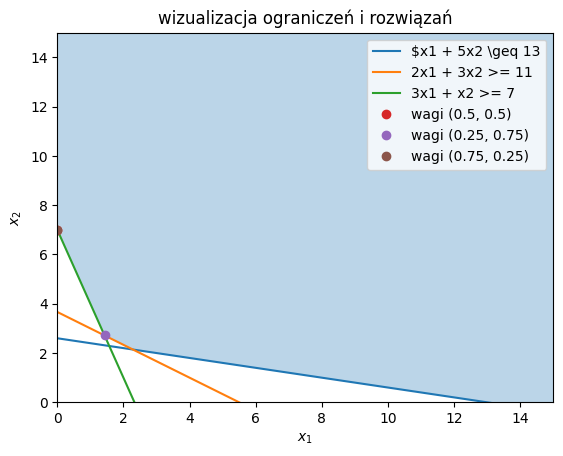

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def f1(x1, x2):
    return 3*x1 - x2

def f2(x1, x2):
    return 5*x1 + 3*x2

# ograniczenia
A = [
    [-1, -5],  # x1 + 5x2 >= 13 -> -x1 - 5x2 <= -13
    [-2, -3],  # 2x1 + 3x2 >= 11 -> -2x1 - 3x2 <= -11
    [-3, -1]   # 3x1 + x2 >= 7 -> -3x1 - x2 <= -7
]
b = [-13, -11, -7]

# ograniczenia brzegowe
x_bounds = (0, None)
y_bounds = (0, None)


weights = [(0.5, 0.5), (0.25, 0.75), (0.75, 0.25)]
cost_functions = [
    [4, 1],   # 0.5(3x1 - x2) + 0.5(5x1 + 3x2) -> 4x1 + x2
    [4.5, 2], # 0.25(3x1 - x2) + 0.75(5x1 + 3x2) -> 4.5x1 + 2x2
    [3.5, 0]  # 0.75(3x1 - x2) + 0.25(5x1 + 3x2) -> 3.5x1
]

solutions = []
for c in cost_functions:
    result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds])
    solutions.append(result.x)

solutions = np.array(solutions)

# wyswietlanie wynikow
for i, (weight, sol) in enumerate(zip(weights, solutions)):
    print(f"weights {weight}: {sol} min Value: {cost_functions[i][0]*sol[0] + cost_functions[i][1]*sol[1]}")
    print(f"function 1: {f1(sol[0], sol[1])} function 2: {f2(sol[0], sol[1])}")
    print()

# ------------------- Wizualizacja -------------------


x = np.linspace(0, 15, 400)
y1 = (13 - x) / 5
y2 = (11 - 2*x) / 3
y3 = 7 - 3*x


plt.plot(x, y1, label='x1 + 5x2 >= 13')
plt.plot(x, y2, label='2x1 + 3x2 >= 11')
plt.plot(x, y3, label='3x1 + x2 >= 7')


plt.fill_between(x, np.maximum.reduce([y1, y2, y3]), 15, where=(x <= 15), alpha=0.3)


for i, sol in enumerate(solutions):
    plt.plot(sol[0], sol[1], 'o', label=f'wagi {weights[i]}')

#plt.plot(16/7, 15/7, 'o', label='(16/7, 15/7)')
#plt.plot(10/7, 19/7, 'o', label='(10/7, 19/7)')
#plt.plot(0, 7, 'o', label='(0, 7)')
#plt.plot(13, 0, 'o', label='(13, 0)')

plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('wizualizacja ograniczeń i rozwiązań')

plt.show()